# Error Bar Illustration

In [129]:
from datetime import datetime
from matplotlib import pylab as plt
import pandas as pd
import seaborn as sns

sns.set()

In [130]:
df_dataset = pd.read_csv('../data/processed/processed_daysahead3_R000.csv', index_col='current_time')
df_dataset.index = pd.to_datetime(df_dataset.index)

for col in df_dataset.columns:
    if 'time' in col:
        df_dataset[col] = pd.to_datetime(df_dataset[col])

df_dataset.head()

,forward_time0,Vp_pred0,Vp_obs0,sigma0,crps0,forward_time1,Vp_pred1,Vp_obs1,sigma1,crps1,...,forward_time10,Vp_pred10,Vp_obs10,sigma10,crps10,forward_time11,Vp_pred11,Vp_obs11,sigma11,crps11
current_time,,,,,,,,,,,,,,,,,,,,,
2010-01-08 12:00:00,2010-01-08 18:00:00,320.569697,283.535000,66.959643,23.617758,2010-01-09 00:00:00,312.584848,289.951667,89.107926,23.105251,...,2010-01-11 06:00:00,410.350000,353.420000,77.615267,34.088606,2010-01-11 12:00:00,524.100000,459.845000,107.379439,39.991405
2010-01-08 18:00:00,2010-01-09 00:00:00,312.584848,289.951667,76.443002,20.518383,2010-01-09 06:00:00,304.600000,294.783333,90.828665,21.649059,...,2010-01-11 12:00:00,524.100000,459.845000,97.937210,39.127235,2010-01-11 18:00:00,338.315385,473.376667,90.759446,89.321174
2010-01-09 00:00:00,2010-01-09 06:00:00,304.600000,294.783333,71.339896,17.209824,2010-01-09 12:00:00,318.100000,291.255000,81.895182,22.617970,...,2010-01-11 18:00:00,338.315385,473.376667,89.352175,89.750479,2010-01-12 00:00:00,340.570588,478.650000,92.195806,91.496123
2010-01-09 06:00:00,2010-01-09 12:00:00,318.100000,291.255000,66.850183,19.866330,2010-01-09 18:00:00,305.400000,278.983333,83.825415,22.883527,...,2010-01-12 00:00:00,340.570588,478.650000,92.907464,91.281199,2010-01-12 06:00:00,509.300000,469.765000,99.331979,29.409278
2010-01-09 12:00:00,2010-01-09 18:00:00,305.400000,278.983333,72.419260,20.726205,2010-01-10 00:00:00,292.700000,267.603333,90.733372,23.955744,...,2010-01-12 06:00:00,509.300000,469.765000,102.177195,29.905951,2010-01-12 12:00:00,482.450000,452.088000,107.247701,28.469650


In [131]:

df_obs = pd.read_csv('../data/ace_hr.dat', sep="\\s+", comment="#")
df_obs = df_obs[df_obs.year >= df_dataset.index.min().year]
df_obs = df_obs[df_obs.year <= df_dataset.index.max().year]
df_obs.index = [
    datetime(int(row.year), int(row.month), int(row.day), int(row.hour))
    for _, row in df_obs.iterrows()
]


In [132]:
df_obs.head()

,juldate,month,day,hour,year,doy,Vp_obs,Br_obs,imf_obs,Np_obs,beta_obs
2010-01-01 00:00:00,15197.50,1,1,0,2010,1,276.62,0.09,1.0,0.0,0.0
2010-01-01 01:00:00,15197.54,1,1,1,2010,1,271.82,0.63,1.0,0.0,0.0
2010-01-01 02:00:00,15197.58,1,1,2,2010,1,273.09,0.58,1.0,0.0,0.0
2010-01-01 03:00:00,15197.62,1,1,3,2010,1,278.73,-0.05,-1.0,0.0,0.0
2010-01-01 04:00:00,15197.67,1,1,4,2010,1,271.79,0.11,1.0,0.0,0.0


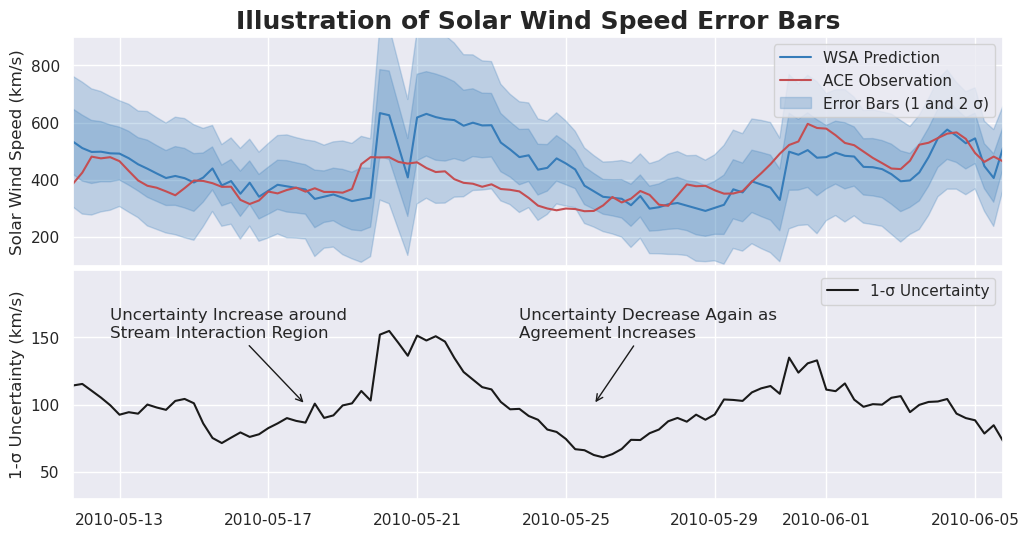

In [137]:
blue_color = '#367cb9'
red_color = 'r'
black_color= 'k'
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

forward_idx = 3
time_col = f'forward_time{forward_idx}'
pred_col = f'Vp_pred{forward_idx}'
obs_col = f'Vp_obs{forward_idx}'
sigma_col = f'sigma{forward_idx}'

ax = axes[0]
ax.plot(df_dataset[time_col], df_dataset[pred_col], color=blue_color, label='WSA Prediction')
ax.plot(df_dataset[time_col], df_dataset[obs_col], color=red_color, label='ACE Observation')
ax.fill_between(df_dataset[time_col], df_dataset[pred_col] - df_dataset[sigma_col], df_dataset[pred_col] + df_dataset[sigma_col], alpha=0.25, color=blue_color, label='Error Bars (1 and 2 σ)')
ax.fill_between(df_dataset[time_col], df_dataset[pred_col] - 2 * df_dataset[sigma_col], df_dataset[pred_col] + 2 * df_dataset[sigma_col], alpha=0.25, color=blue_color)
ax.set_ylabel('Solar Wind Speed (km/s)')
ax.set_yticks([200, 400, 600, 800])
ax.set_ylim(100, 900)

ax = axes[1]
ax.plot(df_dataset[time_col], df_dataset[sigma_col], color=black_color, label='1-σ Uncertainty')
ax.set_ylabel('1-σ Uncertainty (km/s)')
ax.set_ylim(30, 200)
ax.set_yticks([50, 100, 150])

ax.annotate("Uncertainty Decrease Again as\nAgreement Increases",
            xytext=(pd.Timestamp('2010-05-23 18:00:00'), 150),
            xy=(pd.Timestamp('2010-05-25 18:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

ax.annotate("Uncertainty Increase around\nStream Interaction Region",
            xytext=(pd.Timestamp('2010-05-12 18:00:00'), 150),
            xy=(pd.Timestamp('2010-05-18 00:00:00'), 100),
            arrowprops=dict(arrowstyle="->", color='k'))

for ax in axes:
    ax.legend()

#i = 500
#print(repr((df_dataset.index[i], df_dataset.index[i + 100])))
#    ax.set_xlim(df_dataset.index[i], df_dataset.index[i + 100])

#plt.xlim(pd.Timestamp('2010-02-25 18:00:00'), pd.Timestamp('2010-03-22 18:00:00'))
axes[0].set_xlim((pd.Timestamp('2010-05-11 18:00:00'), pd.Timestamp('2010-06-05 18:00:00')))
axes[0].set_title('Illustration of Solar Wind Speed Error Bars', fontweight='bold', fontsize=18)
plt.subplots_adjust(wspace=0.4, hspace=0.02) 
plt.savefig('../plots/error_bar_illustration.png', dpi=300)